### **Regressione Lineare**

*Implementare l'algoritmo della regressione lineare con regolarizzazione in codice Python. 
E' possibile utilizzare le librerie NumPy e Pandas. 
Il codice deve essere una sorta di porting degli algoritmi visti a lezione.*

**Import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Caricamento dati e preprocessing**

yes = 1,
no  = 0

F   = 1,
M   = 0

GP  = 1,
MS  = 0

U   = 1,
R   = 0

LE3 = 1,
GT3 = 0

T   = 1,
A   = 0

JOB = (numeric: "other" = 0, "at_home" = 1,  "teacher" = 2, "health" = 3 care related, civil "services" = 4 (e.g. administrative or police)),

REASON = (numeric: "other" = 0, close to "home" = 1, school "reputation" = 2, "course" preference = 3),

GUARDIAN =  (nominal: "other" = 0,"father" = 1, "mother" = 2)

In [ ]:
data = pd.read_csv("/content/student-mat.csv", delimiter=';')

data.school[data.school == 'GP'] = 1
data.school[data.school == 'MS'] = 0

data.sex[data.sex == 'F'] = 1
data.sex[data.sex == 'M'] = 0

data.address[data.address == 'U'] = 1
data.address[data.address == 'R'] = 0

data.famsize[data.famsize == 'LE3'] = 1
data.famsize[data.famsize == 'GT3'] = 0

data.Pstatus[data.Pstatus == 'T'] = 1
data.Pstatus[data.Pstatus == 'A'] = 0

data.Mjob[data.Mjob == 'other'] = 0
data.Mjob[data.Mjob == 'at_home'] = 1
data.Mjob[data.Mjob == 'teacher'] = 2
data.Mjob[data.Mjob == 'health'] = 3
data.Mjob[data.Mjob == 'services'] = 4

data.Fjob[data.Fjob == 'other'] = 0
data.Fjob[data.Fjob == 'at_home'] = 1
data.Fjob[data.Fjob == 'teacher'] = 2
data.Fjob[data.Fjob == 'health'] = 3
data.Fjob[data.Fjob == 'services'] = 4

data.reason[data.reason == 'other'] = 0
data.reason[data.reason == 'home'] = 1
data.reason[data.reason == 'reputation'] = 2
data.reason[data.reason == 'course'] = 3

data.guardian[data.guardian == 'other'] = 0
data.guardian[data.guardian == 'father'] = 1
data.guardian[data.guardian == 'mother'] = 2

data.schoolsup[data.schoolsup == 'yes'] = 1
data.schoolsup[data.schoolsup == 'no'] = 0

data.famsup[data.famsup == 'yes'] = 1
data.famsup[data.famsup == 'no'] = 0

data.paid[data.paid == 'yes'] = 1
data.paid[data.paid == 'no'] = 0

data.activities[data.activities == 'yes'] = 1
data.activities[data.activities == 'no'] = 0

data.nursery[data.nursery == 'yes'] = 1
data.nursery[data.nursery == 'no'] = 0

data.higher[data.higher == 'yes'] = 1
data.higher[data.higher == 'no'] = 0

data.internet[data.internet == 'yes'] = 1
data.internet[data.internet == 'no'] = 0

data.romantic[data.romantic == 'yes'] = 1
data.romantic[data.romantic == 'no'] = 0

In [17]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,0,0,4,4,1,2,3,2,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,0,1,1,1,1,0,3,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,1,1,1,1,1,0,0,2,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,0,1,4,2,3,4,1,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,0,1,3,3,0,0,1,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


**Gradient Descent**

In [249]:
def gradientDescent(X, y, theta, alpha, num_iterations, lambda_value):
  m = len(y) # numero di esempi di training
  J_history = []  # ripeti fino alla convergenza
  for iteration in range(num_iterations):
    h = np.matmul(X, theta) - y
    theta = theta - alpha / m * np.matmul(X.transpose(), h)
    # Salva il costo J per ogni iterazione
    J_history.append(costFunction(X, y, theta, lambda_value))  
  return theta, J_history

**Cost Function**

In [248]:
def costFunction(X, y, theta, lambda_value):
  m = len(y) # numero di esempi di training
  diff = np.matmul(X, theta) - y
  reg_term = (lambda_value / 2 * m) * np.sum((np.square(theta)))
  J = 1 / (2 * m) * np.matmul(diff, diff) + reg_term
  return J

**Regressione Lineare**

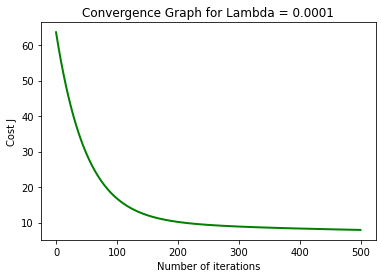

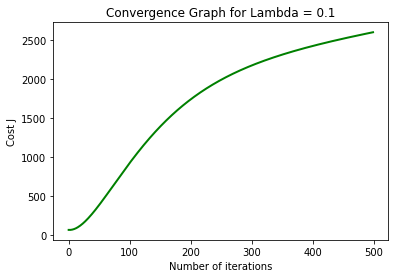

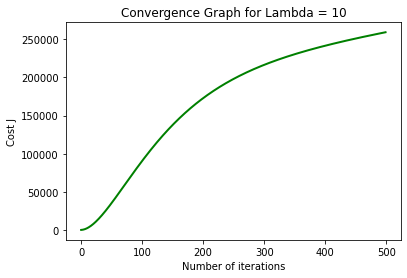

In [257]:
df = data.copy()
#print(df.head())
Y = df['G3']
df = df.drop(['G3'], axis = 1)
#print(df.head())

X = df.to_numpy()
#print(Y)
y = Y.to_numpy().transpose()
#print(y)
m = X.shape[0]
n = X.shape[1]
#print(m, n)

mu = X.mean(0) 
#print(type(X))
#print(type(mu))
sigma = X.max(0) - X.min(0)
#print(type(sigma))
diff = np.subtract(X, mu)
xn = diff / sigma
#print(xn.shape)
#print(type(xn))

X0 = np.hstack((np.ones((m, 1)), xn))
#print(X0.shape)
#print(type(X0))

alpha = 0.01
iterations = 500
theta_init = np.zeros((n+1))

#J = costFunction(X0, y, theta_init)
#print(J)

#Valori per lambda = [0.0001, 0.001, 0.01, 0.1, 1, 10]

# Lambda = 0.0001
theta, J_history = gradientDescent(X0, y, theta_init, alpha, iterations, 0.0001)
#print('Best theta computed from gradient descent: ')
#print(f' {theta} ')

plt.plot(np.arange(iterations), J_history, '-g', LineWidth=2)
plt.title('Convergence Graph for Lambda = 0.0001')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# Lambda = 0.1
theta, J_history = gradientDescent(X0, y, theta_init, alpha, iterations, 0.1)
#print('Best theta computed from gradient descent: ')
#print(f' {theta} ')

plt.plot(np.arange(iterations), J_history, '-g', LineWidth=2)
plt.title('Convergence Graph for Lambda = 0.1')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# Lambda = 10
theta, J_history = gradientDescent(X0, y, theta_init, alpha, iterations, 10)
#print('Best theta computed from gradient descent: ')
#print(f' {theta} ')

plt.plot(np.arange(iterations), J_history, '-g', LineWidth=2)
plt.title('Convergence Graph for Lambda = 10')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()


In [ ]:
different_alpha = 10
alpha_possible = np.zeros((different_alpha, 1))
alpha_possible[0] = 0.001
#print(alpha_possible)
for i in range(different_alpha):
   alpha_possible[i] = alpha_possible[i-1]*3
cost_function_alpha = np.zeros((iterations, different_alpha))
#print(cost_function_alpha)
convergenceTest = np.zeros((different_alpha,1))
#print(convergenceTest)
for i in range(different_alpha):
   theta_inner = np.zeros((n,1))
   #print(theta_inner.shape)
   #print(y.shape)
   #print(X0.shape)
   alpha_val = alpha_possible[i]
   #theta_inner, cost_function_alpha[:,i] = gradientDescent(X,y,theta_inner,alpha_val,iterations)
   cost_val = cost_function_alpha[:,i]
   convergenceTest[i] = testConvergence(cost_val)
convergenceTest

In [126]:
def testConvergence(values):
  dim = max(values.shape)
  for i in range(2, dim):
    if (values[i] >= values[i-1]):
      test = 0
    else:
      test = 1
  return test